In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import pylab
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
df_gold = pd.read_csv('stock-data/GOLD.csv')
df_goog = pd.read_csv('stock-data/GOOG.csv')
df_aapl = pd.read_csv('stock-data/AAPL.csv')
df_msft = pd.read_csv('stock-data/MSFT.csv')
df_amzn = pd.read_csv('stock-data/AMZN.csv')

In [3]:
df = df_gold[['Date','Close']]
df.rename(columns={"Close":"GOLD"},inplace=True)
df['GOOG'] = df_goog['Close'].tolist()
df['AAPL'] = df_aapl['Close'].tolist()
df['MSFT'] = df_msft['Close'].tolist()
df['AMZN'] = df_amzn['Close'].tolist()
df.head()

/home/mohsin/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
/home/mohsin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mohsin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,Date,GOLD,GOOG,AAPL,MSFT,AMZN
0,2005-06-20,24.320000,142.814697,5.372857,25.110001,35.689999
1,2005-06-21,24.389999,143.382568,5.408571,25.150000,35.380001
2,2005-06-22,24.480000,144.109848,5.507143,25.070000,35.220001
3,2005-06-23,24.750000,144.314072,5.555714,25.309999,35.430000
4,2005-06-24,24.920000,148.069992,5.394286,25.040001,35.020000


In [4]:
df.tail()

,Date,GOLD,GOOG,AAPL,MSFT,AMZN
3772,2020-06-15,24.740000,1419.849976,342.989990,188.940002,2572.679932
3773,2020-06-16,24.379999,1442.719971,352.079987,193.570007,2615.270020
3774,2020-06-17,24.250000,1451.119995,351.589996,194.240005,2640.979980
3775,2020-06-18,23.940001,1435.959961,351.730011,196.320007,2653.979980
3776,2020-06-19,24.490000,1431.719971,349.720001,195.149994,2675.010010


In [5]:
df.describe()

,GOLD,GOOG,AAPL,MSFT,AMZN
count,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000
mean,26.911991,538.666028,87.756745,50.909391,536.369087
std,12.830237,360.413985,73.611652,37.790759,623.429911
min,5.940000,128.239334,5.195714,15.150000,26.070000
25%,16.190001,251.557098,24.330000,27.129999,84.000000
50%,26.260000,367.607117,73.571426,31.790001,256.410004
75%,37.520000,771.409973,125.260002,57.660000,764.719971
max,55.630001,1526.689941,352.839996,196.839996,2675.010010


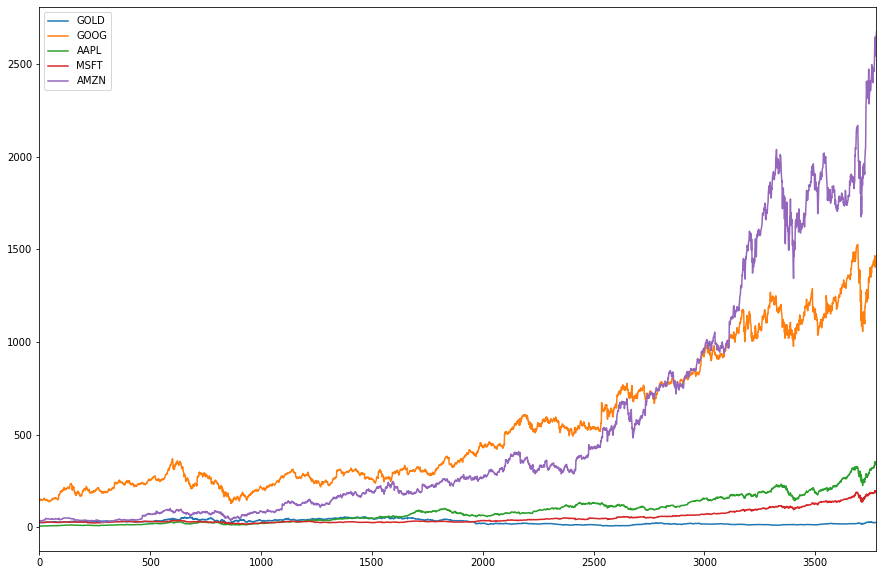

In [6]:
df.plot(figsize=(15,10))
plt.show()

## Date transformation of Date 

In [13]:
df.Date = pd.to_datetime(df["Date"],yearfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3777 entries, 0 to 3776
Data columns (total 6 columns):
Date    3777 non-null datetime64[ns]
GOLD    3777 non-null float64
GOOG    3777 non-null float64
AAPL    3777 non-null float64
MSFT    3777 non-null float64
AMZN    3777 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 177.2 KB


In [15]:
df.Date.describe()

count                    3777
unique                   3777
top       2007-09-10 00:00:00
freq                        1
first     2005-06-20 00:00:00
last      2020-06-19 00:00:00
Name: Date, dtype: object

## Setting index for Date

In [20]:
df.set_index(["Date"],inplace=True)
df.head()

,GOLD,GOOG,AAPL,MSFT,AMZN
Date,,,,,
2005-06-20,24.320000,142.814697,5.372857,25.110001,35.689999
2005-06-21,24.389999,143.382568,5.408571,25.150000,35.380001
2005-06-22,24.480000,144.109848,5.507143,25.070000,35.220001
2005-06-23,24.750000,144.314072,5.555714,25.309999,35.430000
2005-06-24,24.920000,148.069992,5.394286,25.040001,35.020000


In [26]:
df = df.asfreq('d')
df.head(10)

,GOLD,GOOG,AAPL,MSFT,AMZN
Date,,,,,
2005-06-20,24.320000,142.814697,5.372857,25.110001,35.689999
2005-06-21,24.389999,143.382568,5.408571,25.150000,35.380001
2005-06-22,24.480000,144.109848,5.507143,25.070000,35.220001
2005-06-23,24.750000,144.314072,5.555714,25.309999,35.430000
2005-06-24,24.920000,148.069992,5.394286,25.040001,35.020000
2005-06-25,NaN,NaN,NaN,NaN,NaN
2005-06-26,NaN,NaN,NaN,NaN,NaN
2005-06-27,24.600000,151.482208,5.300000,25.049999,34.500000
2005-06-28,24.700001,150.436127,5.330000,25.070000,33.709999


In [27]:
## The missing values are due to the non-business days on Saturdays and Sundays. We can handle this using the 
## business days frequencies.
df = df.asfreq('b')
df.head(10)

,GOLD,GOOG,AAPL,MSFT,AMZN
Date,,,,,
2005-06-20,24.320000,142.814697,5.372857,25.110001,35.689999
2005-06-21,24.389999,143.382568,5.408571,25.150000,35.380001
2005-06-22,24.480000,144.109848,5.507143,25.070000,35.220001
2005-06-23,24.750000,144.314072,5.555714,25.309999,35.430000
2005-06-24,24.920000,148.069992,5.394286,25.040001,35.020000
2005-06-27,24.600000,151.482208,5.300000,25.049999,34.500000
2005-06-28,24.700001,150.436127,5.330000,25.070000,33.709999
2005-06-29,25.799999,145.813461,5.195714,25.090000,33.349998
2005-06-30,25.030001,146.525787,5.258572,24.840000,33.090000


In [43]:
df.isna().sum()

GOLD    138
GOOG    138
AAPL    138
MSFT    138
AMZN    138
dtype: int64

In [46]:
df.fillna(method='ffill',inplace=True)
df.isna().sum()

GOLD    0
GOOG    0
AAPL    0
MSFT    0
AMZN    0
dtype: int64

In [47]:
df.head()

,GOLD,GOOG,AAPL,MSFT,AMZN
Date,,,,,
2005-06-20,24.320000,142.814697,5.372857,25.110001,35.689999
2005-06-21,24.389999,143.382568,5.408571,25.150000,35.380001
2005-06-22,24.480000,144.109848,5.507143,25.070000,35.220001
2005-06-23,24.750000,144.314072,5.555714,25.309999,35.430000
2005-06-24,24.920000,148.069992,5.394286,25.040001,35.020000


## Splitting the data

In [57]:
size = int(0.80 * len(df))
print (size)

3132


In [58]:
train_df = df.iloc[:size]
test_df = df.iloc[size:]
print ("Training Data: {}\n Testing Date: {}".format(len(train_df),len(test_df)))

Training Data: 3132
 Testing Date: 783
